In [1]:
# import functional libraries
import numpy as np
import pandas as pd
import os
import scipy
import math
import matplotlib.pyplot as plt
import time
import sys
import cv2
import util

# export tree
from sklearn.tree import export_graphviz
from subprocess import call

# prepreocessing
from sklearn import preprocessing

# classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans


In [2]:
df3 = pd.read_csv('./output/data/full_dataset/everything.csv')

FileNotFoundError: [Errno 2] File b'./output/data/full_dataset/everything.csv' does not exist: b'./output/data/full_dataset/everything.csv'

In [442]:
snatch_deadlift_tot = 0
snatch_tot = 0
overhead_squat_tot = 0
power_snatch_tot = 0
deadlift_tot = 0
clean_tot = 0
front_squat_tot = 0
power_clean_tot = 0

for i in range(3):
    # extract features and target data
    mvmt_data = df3.loc[:, '18':'85']
    mvmt_target = df3.loc[:, '86']

    # split 
    x_train, x_test, y_train, y_test = train_test_split(mvmt_data, 
                                                    mvmt_target.astype('int'), 
                                                    test_size = 0.25)

    # RANDOM FOREST - maybe....

    # create model 
    rf = RandomForestClassifier(n_estimators = 50, 
                            random_state = 0)

    # fit the model
    rf.fit(x_train, y_train)

    # ROC data
    predicted_rf = np.array(rf.predict_proba(x_test))[:,1]

    # predict
    y_pred = rf.predict(x_test)

    # print
    print('forest accuracy: %s' % metrics.accuracy_score(y_test, y_pred))


    # extract features and target data
    df4 = pd.read_csv('./output/data/test_6_time_data.csv')
    df4 = df4.fillna(0)
    test_data = df4.loc[:, '18':'85']
    test_target = df4.loc[:, '86']

    # predict
    y_pred = rf.predict(test_data)

    snatch_deadlift = 0
    snatch = 0
    overhead_squat = 0
    power_snatch = 0
    deadlift = 0
    clean = 0
    front_squat = 0
    power_clean = 0

    for i in y_pred:
        if i == 0:
            snatch_deadlift += 1
        elif i == 1:
            snatch += 1
        elif i == 2:
            overhead_squat += 1
        elif i == 3:
            power_snatch += 1
        elif i == 4:
            deadlift += 1
        elif i == 5:
            clean += 1
        elif i == 6:
            front_squat += 1
        elif i == 7:
            power_clean += 1
            
    snatch_deadlift_tot += snatch_deadlift
    snatch_tot += snatch
    overhead_squat_tot += overhead_squat
    power_snatch_tot += power_snatch
    deadlift_tot += deadlift
    clean_tot += clean
    front_squat_tot += front_squat
    power_clean_tot += power_clean
        
    print('snatch_deadlift: %d' % snatch_deadlift)
    print('snatch: %d' % snatch)
    print('overhead_squat: %d' % overhead_squat)
    print('power_snatch: %d' % power_snatch)
    print('deadlift: %d' % deadlift)
    print('clean: %d' % clean)
    print('front_squat: %d' % front_squat)
    print('power_clean: %d\n' % power_clean)
    

forest accuracy: 0.9575221238938053
snatch_deadlift: 0
snatch: 1
overhead_squat: 0
power_snatch: 1
deadlift: 0
clean: 0
front_squat: 1
power_clean: 0

forest accuracy: 0.9805309734513274
snatch_deadlift: 0
snatch: 1
overhead_squat: 1
power_snatch: 0
deadlift: 0
clean: 1
front_squat: 0
power_clean: 0

forest accuracy: 0.9858407079646018
snatch_deadlift: 0
snatch: 1
overhead_squat: 1
power_snatch: 0
deadlift: 0
clean: 1
front_squat: 0
power_clean: 0



In [443]:
def classify(sd, s, ohs, ps, d, c, fs, pc):
    if (sd + s + ohs + ps) < (d + c + fs + pc):
        if fs > pc:
            print('clean')
        else:
            print('power_clean')
    else:
        if ohs > ps:
            print('snatch')
        else:
            print('power_snatch')
    

In [444]:
classify(snatch_deadlift_tot, snatch_tot, overhead_squat_tot, power_snatch_tot, 
         deadlift_tot, clean_tot, front_squat_tot, power_clean_tot)


snatch


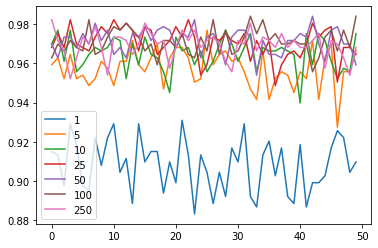

In [11]:
temp = [1, 5, 10, 25, 50, 100, 250]

for i in temp:
    x = list(range(50))
    y = []
    for j in range(50):
        # extract features and target data
        mvmt_data = df3.loc[:, '0':'85']
        mvmt_target = df3.loc[:, '86']
        x_train, x_test, y_train, y_test = train_test_split(mvmt_data, 
                                                    mvmt_target.astype('int'), 
                                                    test_size = 0.25)
        # create model 
        rf = RandomForestClassifier(n_estimators = i, 
                            random_state = 0)

        # fit the model
        rf.fit(x_train, y_train)
        
        # predict
        y_pred = rf.predict(x_test)
        y.append(metrics.accuracy_score(y_test, y_pred))
        
    plt.plot(x, y, label=i)
    plt.legend()

In [9]:
# feature importances
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [221]:
fi

,feature,importance
20,20,0.057662
52,52,0.057383
54,54,0.054077
72,72,0.053291
18,18,0.046318
...,...,...
16,16,0.000453
14,14,0.000434
7,7,0.000426
10,10,0.000365


In [10]:
# features dictionary
features = {
    'nose': 0,
    'neck': 1,
    'Rsho': 2,
    'Relb': 3,
    'Rwri': 4,
    'Lsho': 5,
    'Lelb': 6,
    'Lwri': 7,
    'Rhip': 8,
    'Rkne': 9,
    'Rank': 10,
    'Lhip': 11,
    'Lkne': 12,
    'Lank': 13,
    'Leye': 14,
    'Reye': 15,
    'Lear': 16,
    'Rear': 17,
    'Rwri_Lwri': 18,
    'Rwri_Lwri_delta': 19,
    'Relb_Lelb': 20,
    'Relb_Lelb_delta': 21,
    'Rwri_Relb': 22,
    'Rwri_Relb_delta': 23,
    'Rwri_Rsho': 24,
    'Rwri_Rsho_delta': 25,
    'Relb_Rsho': 26,
    'Relb_Rsho_delta': 27,
    'Lwri_Lelb': 28,
    'Lwri_Lelb_delta': 29,
    'Lwri_Lsho': 30,
    'Lwri_Lsho_delta': 31,
    'Lelb_Lsho': 32,
    'Lelb_Lsho_delta': 33,
    'Rank_Rkne': 34,
    'Rank_Rkne_delta': 35,
    'Rank_Rhip': 36,
    'Rank_Rhip_delta': 37,
    'Rkne_Rhip': 38,
    'Rkne_Rhip_delta': 39,
    'Lank_Lkne': 40,
    'Lank_Lkne_delta': 41,
    'Lank_Lhip': 42,
    'Lank_Lhip_delta': 43,
    'Lkne_Lhip': 44,
    'Lkne_Lhip_delta': 45,
    'Rwri_Rhip': 46,
    'Rwri_Rhip_delta': 47,
    'Rwri_Rkne': 48,
    'Rwri_Rkne_delta': 49,
    'Rwri_Rank': 50,
    'Rwri_Rank_delta': 51,
    'Lwri_Lhip': 52,
    'Lwri_Lhip_delta': 53,
    'Lwri_Lkne': 54,
    'Lwri_Lkne_delta': 55,
    'Lwri_Lank': 56,
    'Lwri_Lank_delta': 57,
    'Relb_Rkne': 58,
    'Relb_Rkne_delta': 59,
    'Relb_Rank': 60,
    'Relb_Rank_delta': 61,
    'Lelb_Lkne': 62,
    'Lelb_Lkne_delta': 63,
    'Lelb_Lank': 64,
    'Lelb_Lank_delta': 65,
    'nose_Rank': 66,
    'nose_Rank_delta': 67,
    'nose_Lank': 68,
    'nose_Lank_delta': 69,
    'nose_Rkne': 70,
    'nose_Rkne_delta': 71,
    'nose_Lkne': 72,
    'nose_Lkne_delta': 73,
    'nose_Rhip': 74,
    'nose_Rhip_delta': 75,
    'nose_Lhip': 76,
    'nose_Lhip_delta': 77,
    'nose_Rwri': 78,
    'nose_Rwri_delta': 79,
    'nose_Lwri': 80,
    'nose_Lwri_delta': 81,
    'nose_Relb': 82,
    'nose_Relb_delta': 83,
    'nose_Lelb': 84,
    'nose_Lelb_delta': 85
}


In [11]:
# movements dictionary 
movements = {
    'snatch_deadlift': 0,
    'snatch': 1,
    'overhead_squat': 2,
    'power_snatch': 3,
    'deadlift': 4,
    'clean': 5,
    'front_squat': 6,
    'power_clean': 7
}


In [14]:
# save an image from one of the decision trees in the model
tree = 31

f = list(features.keys())
c = list(movements.keys()) 

# Export as dot file
export_graphviz(rf.estimators_[tree], out_file='tree.dot', 
                feature_names = f,
                class_names = c,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.jpg', '-Gdpi=600'])


0

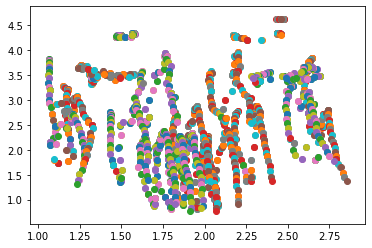

In [99]:
for index, row in temp.iterrows():
    for i in row:
        try:
            x = float(i.split('(')[1].split(',')[0])
            y = float(i.split(',')[1].split(')')[0])
            plt.scatter(x, y)
        except:
            continue

In [213]:
joint = 'nose_Rwri_delta'
jointnum = 79

In [214]:
boi1 = pd.read_csv('./output/data/scaled/snatch_1_time_data.csv')
boi2 = pd.read_csv('./output/data/scaled/snatch_2_time_data.csv')
boi3 = pd.read_csv('./output/data/scaled/snatch_3_time_data.csv')
boi4 = pd.read_csv('./output/data/scaled/snatch_4_time_data.csv')
boi5 = pd.read_csv('./output/data/scaled/snatch_5_time_data.csv')
boi6 = pd.read_csv('./output/data/scaled/snatch_6_time_data.csv')
boi7 = pd.read_csv('./output/data/scaled/snatch_7_time_data.csv')
boi8 = pd.read_csv('./output/data/scaled/snatch_8_time_data.csv')
boi9 = pd.read_csv('./output/data/scaled/snatch_9_time_data.csv')
boi10 = pd.read_csv('./output/data/scaled/snatch_10_time_data.csv')
boi11 = pd.read_csv('./output/data/scaled/snatch_11_time_data.csv')
boi12 = pd.read_csv('./output/data/scaled/snatch_12_time_data.csv')
boi13 = pd.read_csv('./output/data/scaled/snatch_13_time_data.csv')
boi14 = pd.read_csv('./output/data/scaled/snatch_14_time_data.csv')
boi15 = pd.read_pickle('./output/data/supp/snatch_15_time_data')
boi16 = pd.read_pickle('./output/data/supp/snatch_16_time_data')
boi17 = pd.read_pickle('./output/data/supp/snatch_17_time_data')
boi18 = pd.read_pickle('./output/data/supp/snatch_18_time_data')
boi19 = pd.read_pickle('./output/data/supp/snatch_19_time_data')
boi20 = pd.read_pickle('./output/data/supp/snatch_20_time_data')


In [215]:
y1 = boi1.loc[:, joint].values.tolist()
x1 = list(range(len(y1)))

y2 = boi2.loc[:, joint].values.tolist()
x2 = list(range(len(y2)))

y3 = boi3.loc[:, joint].values.tolist()
x3 = list(range(len(y3)))

y4 = boi4.loc[:, joint].values.tolist()
x4 = list(range(len(y4)))

y5 = boi5.loc[:, joint].values.tolist()
x5 = list(range(len(y5)))

y6 = boi6.loc[:, joint].values.tolist()
x6 = list(range(len(y6)))

y7 = boi7.loc[:, joint].values.tolist()
x7 = list(range(len(y7)))

y8 = boi8.loc[:, joint].values.tolist()
x8 = list(range(len(y8)))

y9 = boi9.loc[:, joint].values.tolist()
x9 = list(range(len(y9)))

y10 = boi10.loc[:, joint].values.tolist()
x10 = list(range(len(y10)))

y11 = boi11.loc[:, joint].values.tolist()
x11 = list(range(len(y11)))

y12 = boi12.loc[:, joint].values.tolist()
x12 = list(range(len(y12)))

y13 = boi13.loc[:, joint].values.tolist()
x13 = list(range(len(y13)))

y14 = boi14.loc[:, joint].values.tolist()
x14 = list(range(len(y14)))

y15 = boi15.loc[:, jointnum].values.tolist()
x15 = list(range(len(y15)))

y16 = boi16.loc[:, jointnum].values.tolist()
x16 = list(range(len(y16)))

y17 = boi17.loc[:, jointnum].values.tolist()
x17 = list(range(len(y17)))

y18 = boi18.loc[:, jointnum].values.tolist()
x18 = list(range(len(y18)))

y19 = boi19.loc[:, jointnum].values.tolist()
x19 = list(range(len(y19)))

y20 = boi20.loc[:, jointnum].values.tolist()
x20 = list(range(len(y20)))




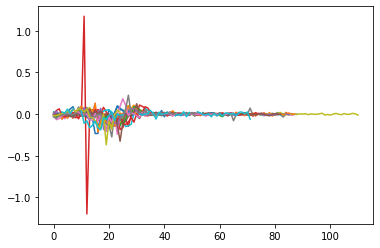

In [216]:
# plot the movement of a specfied joint over the course of a video for all training data from snatches

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)
plt.plot(x8, y8)
plt.plot(x9, y9)
plt.plot(x10, y10)
plt.plot(x11, y11)
plt.plot(x12, y12)
plt.plot(x13, y13)
plt.plot(x14, y14)
plt.plot(x15, y15)
plt.plot(x16, y16)
plt.plot(x17, y17)
plt.plot(x18, y18)
plt.plot(x19, y19)
plt.plot(x20, y20)


In [217]:
boi1 = pd.read_csv('./output/data/scaled/clean_1_time_data.csv')
boi2 = pd.read_csv('./output/data/scaled/clean_2_time_data.csv')
boi3 = pd.read_csv('./output/data/scaled/clean_3_time_data.csv')
boi4 = pd.read_csv('./output/data/scaled/clean_4_time_data.csv')
boi5 = pd.read_csv('./output/data/scaled/clean_5_time_data.csv')
boi6 = pd.read_csv('./output/data/scaled/clean_6_time_data.csv')
boi7 = pd.read_csv('./output/data/scaled/clean_7_time_data.csv')
boi8 = pd.read_csv('./output/data/scaled/clean_8_time_data.csv')
boi9 = pd.read_csv('./output/data/scaled/clean_9_time_data.csv')
boi10 = pd.read_csv('./output/data/scaled/clean_10_time_data.csv')
boi11 = pd.read_csv('./output/data/scaled/clean_11_time_data.csv')
boi12 = pd.read_csv('./output/data/scaled/clean_12_time_data.csv')
boi13 = pd.read_csv('./output/data/scaled/clean_13_time_data.csv')
boi14 = pd.read_csv('./output/data/scaled/clean_14_time_data.csv')
boi15 = pd.read_pickle('./output/data/supp/clean_15_time_data')
boi16 = pd.read_pickle('./output/data/supp/clean_16_time_data')
boi17 = pd.read_pickle('./output/data/supp/clean_17_time_data')
boi18 = pd.read_pickle('./output/data/supp/clean_18_time_data')


In [218]:
y1 = boi1.loc[:, joint].values.tolist()
x1 = list(range(len(y1)))

y2 = boi2.loc[:, joint].values.tolist()
x2 = list(range(len(y2)))

y3 = boi3.loc[:, joint].values.tolist()
x3 = list(range(len(y3)))

y4 = boi4.loc[:, joint].values.tolist()
x4 = list(range(len(y4)))

y5 = boi5.loc[:, joint].values.tolist()
x5 = list(range(len(y5)))

y6 = boi6.loc[:, joint].values.tolist()
x6 = list(range(len(y6)))

y7 = boi7.loc[:, joint].values.tolist()
x7 = list(range(len(y7)))

y8 = boi8.loc[:, joint].values.tolist()
x8 = list(range(len(y8)))

y9 = boi9.loc[:, joint].values.tolist()
x9 = list(range(len(y9)))

y10 = boi10.loc[:, joint].values.tolist()
x10 = list(range(len(y10)))

y11 = boi11.loc[:, joint].values.tolist()
x11 = list(range(len(y11)))

y12 = boi12.loc[:, joint].values.tolist()
x12 = list(range(len(y12)))

y13 = boi13.loc[:, joint].values.tolist()
x13 = list(range(len(y13)))

y14 = boi14.loc[:, joint].values.tolist()
x14 = list(range(len(y14)))

y15 = boi15.loc[:, jointnum].values.tolist()
x15 = list(range(len(y15)))

y16 = boi16.loc[:, jointnum].values.tolist()
x16 = list(range(len(y16)))

y17 = boi17.loc[:, jointnum].values.tolist()
x17 = list(range(len(y17)))

y18 = boi18.loc[:, jointnum].values.tolist()
x18 = list(range(len(y18)))


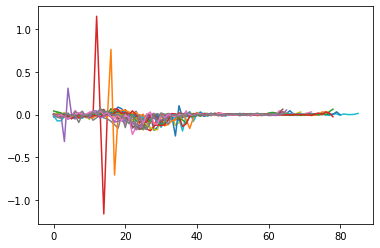

In [219]:
# plot the movement of a specfied joint over the course of a video for all training data from cleans

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)
plt.plot(x8, y8)
plt.plot(x9, y9)
plt.plot(x10, y10)
plt.plot(x11, y11)
plt.plot(x12, y12)
plt.plot(x13, y13)
plt.plot(x14, y14)
plt.plot(x15, y15)
plt.plot(x16, y16)
plt.plot(x17, y17)
plt.plot(x18, y18)


In [220]:
# plot all the joints in a single frame

# x = list(map(lambda x: float(x.split(',')[0].split('(')[1]), boi.loc[1, '0':'17']))
# y = list(map(lambda x: (1184 / 256) - float(x.split(',')[1].split(')')[0]), boi.loc[1, '0':'17']))

In [ ]:
print('snatch_deadlift: %d\n' % snatch_deadlift_tot)
print('snatch: %d\n' % snatch_tot)
print('overhead_squat: %d\n' % overhead_squat_tot)
print('power_snatch: %d\n' % power_snatch_tot)
print('deadlift: %d\n' % deadlift_tot)
print('clean: %d\n' % clean_tot)
print('front_squat: %d\n' % front_squat_tot)
print('power_clean: %d\n' % power_clean_tot)

In [ ]:
# NEIGHBORS

# create and fit model 
neigh = KNeighborsClassifier(n_neighbors = 5)

# fit the model
neigh.fit(x_train, y_train)

# ROC data
# predicted_svm = np.array(svm.predict_proba(x_test))[:,1]

# predict
y_pred = neigh.predict(x_test)

# print
print('nn accuracy: %s' % metrics.accuracy_score(y_test, y_pred))


In [ ]:
# NEURAL NETWORK

# create and fit model 
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# fit the model
mlp.fit(x_train, y_train)

# ROC data
# predicted_svm = np.array(svm.predict_proba(x_test))[:,1]

# predict
y_pred = mlp.predict(x_test)

# print
print('nn accuracy: %s' % metrics.accuracy_score(y_test, y_pred))


In [ ]:
# GAUSSIAN PROCESS - ummmmmm.... consistently 80+ %....

# make kernel
kernel = 1.0 * RBF(1.0) 

# create and fit model 
gpc = GaussianProcessClassifier(kernel = kernel, random_state = 0).fit(x_train, y_train)

# ROC data
# predicted_svm = np.array(svm.predict_proba(x_test))[:,1]

# predict
y_pred = gpc.predict(x_test)

# print
print('gpc accuracy: %s' % metrics.accuracy_score(y_test, y_pred))


In [ ]:
# SUPPORT VECTOR MACHINE - maybe....

# create model 
sv = svm.SVC(gamma = 'scale')

# fit the model
sv.fit(x_train, y_train)

# ROC data
# predicted_svm = np.array(svm.predict_proba(x_test))[:,1]

# predict
y_pred = sv.predict(x_test)

# print
print('svm accuracy: %s' % metrics.accuracy_score(y_test, y_pred))


In [ ]:
# K NEAREST NEIGHBORS - not good, on coordinates/values, maybe, movement.. no

# create model 
knn = KNeighborsClassifier(n_neighbors = 25)

# fit the model
knn.fit(x_train, y_train) 

# ROC data
predicted_knn = np.array(knn.predict_proba(x_test))[:,1]

# predict
y_pred = knn.predict(x_test)

# print
print('neighbors accuracy: %s' % metrics.accuracy_score(y_test, y_pred))


In [ ]:
# STOCHASTIC GRADIENT DESCENT - nah

# create model 
sgd = SGDClassifier(loss = 'modified_huber', 
                    penalty = 'l2', 
                    max_iter = 1000)

# fit the model
sgd.fit(x_train, y_train)  

# ROC data
predicted_sgd = np.array(sgd.predict_proba(x_test))[:,1]

# predict
y_pred = sgd.predict(x_test)

# print
print('sgd accuracy: %s' % metrics.accuracy_score(y_test, y_pred))

